## Surrogates

In [40]:
using Surrogates, LinearAlgebra, StaticArrays, Plots

## Inteprolation

In [41]:
# Points 
num_points = 200
xpoints = [rand() for x in 1:num_points]
min_x, max_x = extrema(xpoints)
ypoints = sort!([rand() for y in 1:num_points]) 
min_y, max_y = extrema(ypoints)
lb = [min_x, min_y]
ub = [max_x, max_y]
points = [SVector(xpoints[i], ypoints[i]) for i in 1:num_points  ]

# Field to interpolate
scalar_field(x,y) = 2x*y + log(x)
scalar_field_values = [scalar_field(p...) for p in points]

# RBS
itp = RadialBasis(points,scalar_field_values,lb,ub, rad = multiquadricRadial())
itp

(::RadialBasis{Surrogates.var"#5#6"{Float64}, Int64, Vector{SVector{2, Float64}}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Transpose{Float64, Vector{Float64}}, Float64, Bool}) (generic function with 1 method)

In [42]:
# Generate grid points for evaluation
ngrid = 50
xgrid = range(min_x, max_x, length = ngrid)
ygrid = range(min_y, max_y, length = ngrid)
grid_points = [SVector(x, y) for x in xgrid, y in ygrid]

# Compute interpolated values and exact values
interpolated_values = [itp(p) for p in grid_points]
exact_values = [scalar_field(p...) for p in grid_points]

# Compute error between interpolated values and exact values
error = interpolated_values .- exact_values
relative_error = abs.(interpolated_values .- exact_values) ./ abs.(exact_values)

50×50 Matrix{Float64}:
 0.532202    0.285286   0.0917606   0.048489     …  0.438067     0.394202
 0.499046    0.084538   0.232215    0.455491        0.0142589    0.0571066
 0.687114    0.293472   0.00281738  0.194038        0.0272865    0.0899572
 0.752911    0.410501   0.169426    0.0158187       0.0284127    0.0760186
 0.695202    0.414137   0.229093    0.122323        0.0180811    0.0498077
 0.555092    0.335563   0.204296    0.140845     …  0.00518641   0.0234934
 0.382683    0.219002   0.134035    0.10599         0.00598102   0.0031634
 0.220912    0.104093   0.0551815   0.052387        0.0126012    0.00785862
 0.0972529   0.0170232  0.00675247  0.00530112      0.0131419    0.00857248
 0.0215686   0.0320357  0.0405706   0.022613        0.00776791   0.000355925
 ⋮                                               ⋱               
 0.0371878   0.0145518  0.00328115  0.000613439     0.000334298  0.000220998
 0.0446832   0.0194911  0.00585652  2.38437e-5      0.000252467  0.0017616
 0.049

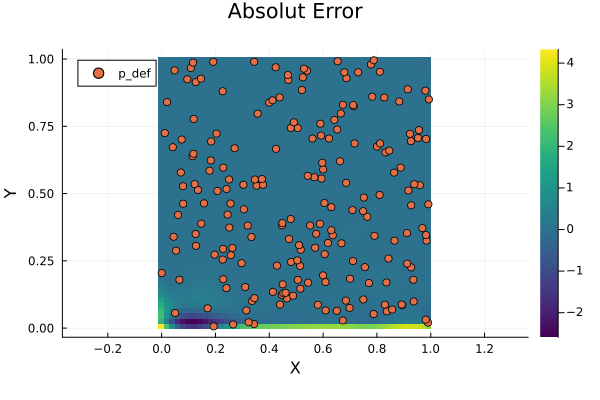

In [43]:
heatmap(xgrid, ygrid, error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Absolut Error")
scatter!(getindex.(points,1), getindex.(points,2), marker = :circle, label="p_def")

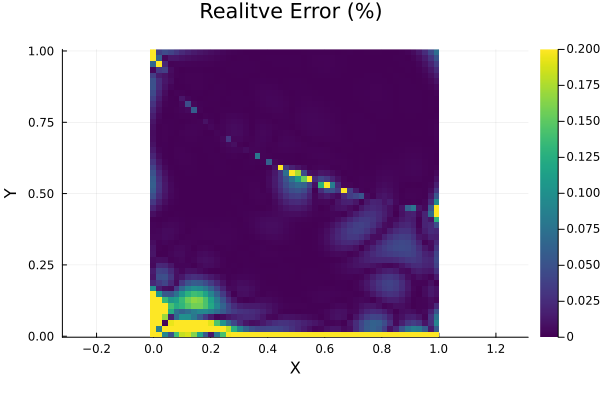

In [44]:
heatmap(xgrid, ygrid, relative_error, aspect_ratio = :equal, color = :viridis, xlabel = "X", ylabel = "Y", title = "Realitve Error (%) ", clims = (0,.20))
